# Project 2
### Minh Tu Bui, Juliana Rosa, Camilo Velez

## About the Data

Source: https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset

Bank client data:
1. age: Age of clients
2. job: Types of job of clients 
3. marital : Marital status 
4. education: Education levels 
5. default: has credit in default? (categorical: "no","yes","unknown")
6. housing: has housing loan? (categorical: "no","yes","unknown")
7. loan: has personal loan? (categorical: "no","yes","unknown")

The last contact of the current campaign:
8. contact: contact communication type (categorical: "cellular","telephone")
9. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
10. dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
12. campaign: number of contacts performed during this campaign and for this client 
13. pdays: number of days that passed by after the client was last contacted from a previous campaign 
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. outcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: "yes","no")

##Questions we are interested in:

Which variables have a bigger impact on the client's decision to make a deposit?

What models can we use to predict the outcome of the marketing campaign in an efficient way?

Should all variables be included in the model? What about missing values?

##Libraries

In [157]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Exploring the Data

In [158]:
bank = pd.read_csv('bank_additional_full.csv', sep=';')

In [159]:
df = bank.copy()

In [160]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [161]:
df.shape

(41188, 21)

In [162]:
df.columns.str.replace('.', '_')

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [163]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [164]:
df = df[['age', 'job', 'marital', 'education', 'housing', 'loan', 'campaign', 'previous', 'poutcome', 'y']]

In [165]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
housing      0
loan         0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64

In [166]:
df.describe(include = 'all')

,age,job,marital,education,housing,loan,campaign,previous,poutcome,y
count,41188.00000,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188,41188
unique,NaN,12,4,8,3,3,NaN,NaN,3,2
top,NaN,admin.,married,university.degree,yes,no,NaN,NaN,nonexistent,no
freq,NaN,10422,24928,12168,21576,33950,NaN,NaN,35563,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,2.567593,0.172963,NaN,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,2.770014,0.494901,NaN,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,NaN,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN


In [167]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [168]:
mask = df.education.isin(['basic.9y', 'basic.4y', 'basic.6y'])
mask.sum()

12513

In [169]:
df.loc[mask, 'education'] = df.loc[mask, 'education'].replace(['basic.9y', 'basic.4y', 'basic.6y'], 'basic')

df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [170]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [171]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [172]:
df = df.replace({"unknown": np.NaN})

In [173]:
df = df.dropna()
df.job.value_counts()

admin.           9937
blue-collar      8560
technician       6380
services         3716
management       2728
retired          1577
entrepreneur     1360
self-employed    1349
housemaid         987
unemployed        963
student           688
Name: job, dtype: int64

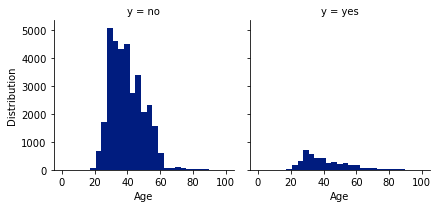

In [174]:
sns.set_palette(sns.color_palette("dark"))
fig1 = sns.FacetGrid(df, 
                     col="y", 
                     margin_titles=True)
fig1.map(plt.hist, "age", bins= np.linspace(0, 100, 30))
fig1.set_axis_labels("Age", "Distribution")

Most of the customers of the bank are in the range of 30-40.

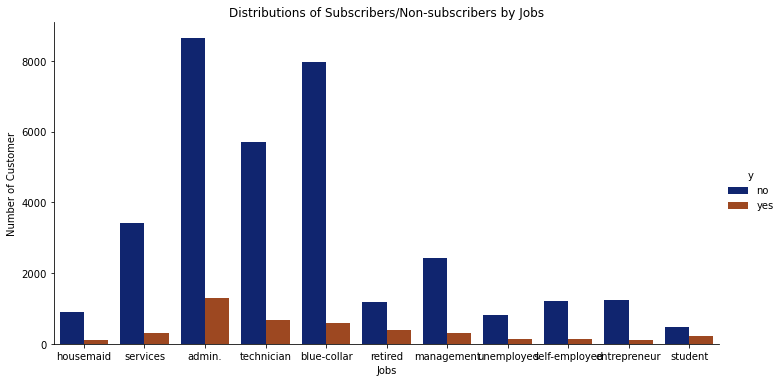

In [175]:
sns.catplot(x="job", data=df, aspect=2, kind='count', hue='y')
plt.xlabel("Jobs")
plt.ylabel("Number of Customer")
plt.title("Distributions of Subscribers/Non-subscribers by Jobs")
plt.show()

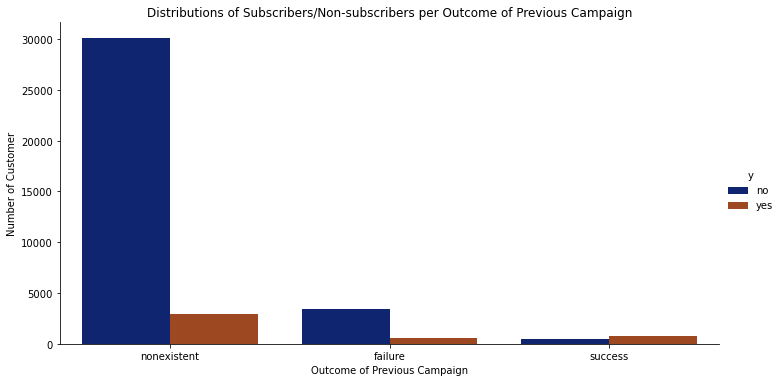

In [176]:
sns.catplot(x="poutcome", data=df, aspect=2, kind='count', hue='y')
plt.xlabel("Outcome of Previous Campaign")
plt.ylabel("Number of Customer")
plt.title("Distributions of Subscribers/Non-subscribers per Outcome of Previous Campaign")
plt.show()

In [177]:
X = df.drop(['y'], axis = 1) 
y = df.y 
X = pd.get_dummies(X, drop_first = True)
X.head()

,age,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,marital_married,marital_single,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success
0,56,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,57,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
2,37,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,1,0
3,40,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,56,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0


##Logistic Regression 1

In [178]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes ['no' 'yes']
Intercept [-2.24472364]
Coefficients [[ 0.03327488 -0.27175377  0.19752716 -0.18566942 -0.05336481 -0.04117188
  -0.03848977  0.13152386 -0.02339183 -0.10916321  0.110696   -0.04860109
   0.01068251  0.0276199   0.10803366  0.02988474  0.02636564  0.03912347
   0.09009695  0.01603599 -0.01971241  0.02120521  0.38502838]]


1. Coefficients: the regression coefficients represent the change in the logit for each unit change in the predictors.
2. Intercept: Logistic regression estimate when all variables in the model are evaluated at zero.

In [179]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9024262706546747
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      8535
         yes       0.68      0.17      0.28      1027

    accuracy                           0.90      9562
   macro avg       0.79      0.58      0.61      9562
weighted avg       0.88      0.90      0.88      9562



1. Precision: Among the cases with the predictions that the clients do not subscribe the bank term deposit, 91% did not actually subscribe. Among the cases with the predictions that the clients subscribe the bank term deposit, 68% subscribed.
2. Recall: For all cases in which the clients did not subscribe, 99% is predicted correctly. For all cases in which the clients did subscribe, 17% is classified correctly.
3. F1-score: the F1-score provides a better measure of the incorrectly classified cases, and since we are more interested in true positives and true negatives we will give more weight to the accuracy than to the F1-score of 0.28. For this we need to state that False Positives are not a problem if we assume that the bank's cost of trying to get a customer to sign up is not too high.
4. Accuracy: 90% of the cases are classified correctly.

In [180]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[8452,   83],
       [ 850,  177]])

Text(0.5, 257.44, 'Predicted label')

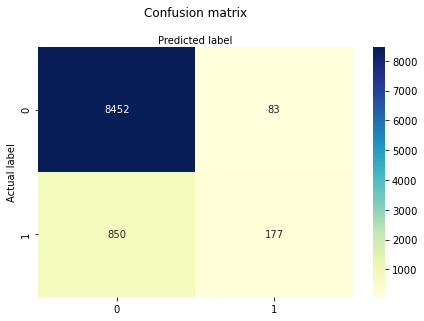

In [181]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba, pos_label='yes')
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()



In [ ]:
print(auc)

There is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. The classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

## Explanatory Variables

In [ ]:
df2 = bank.copy()

In [ ]:
df2["Deposit"] = df2["y"]
df2 = df2.drop(["y"], axis=1)

In [ ]:
df2.head()

In [ ]:
sns.set_palette(sns.color_palette(["aquamarine", "lightseagreen"]))
sns.catplot(x="month", data=df2, kind="count", hue="Deposit", aspect=2, 
            order=["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.ylabel("Frequency")
plt.xlabel("Month")
plt.title("Contact with Bank Clients Over the Months and Results of the Marketing Campaign")
plt.show()

In [ ]:
sns.set_palette(sns.color_palette(["mediumorchid", "darkviolet"]))
sns.catplot(x="Deposit", y="duration", data=df2, kind="box")
plt.ylabel("Duration (in seconds)")
plt.title("Duration of the Call and Results of the Marketing Campaign")
plt.show()

In [ ]:
sns.set_palette(sns.color_palette(["lime", "forestgreen"]))
sns.catplot(x="Deposit", y="campaign", data=df2, kind="box")
plt.ylim(0, 30)
plt.ylabel("Number of Contacts")
plt.title("Number of Contacts with the Bank Client and Results of the Marketing Campaign")
plt.show()

## Logistic Regression 2

In [ ]:
x = df2.drop(["Deposit"], axis=1)
x = pd.get_dummies(x)
y = df2.Deposit

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2000)

In [ ]:
model = LogisticRegression()
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(y_pred)
print(y_test)

In [ ]:
print(model.predict_proba(x_test))

In [ ]:
y_pred_prob = model.predict_proba(x_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label='yes')
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='darkred')
plt.plot([0, 1], [0, 1], color='darkgreen')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.show()

In [ ]:
print(auc)

## Boosted Trees With Tensorflow

In [ ]:
import tensorflow as tf
tf.random.set_seed(243)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
len(y)

In [ ]:
y = df.y

In [ ]:
y = y.map({'yes':1, 'no':0})

In [ ]:
df.columns

In [ ]:
df.dtypes

The Categorical variables are Job, Marital, Education, Housing, Loan, and Poutcome

The numerical variables are age, campaign and previous

In [ ]:
df = df.drop('y', axis=1)

In [ ]:
df.head()

In [ ]:
dftrain,dftest,ytrain,ytest=train_test_split(df,y,test_size=0.20,random_state=0)

Defining Categorical and Numeric Columns

In [ ]:
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']
numeric_columns = ['age', 'campaign', 'previous']

Defining a function to perform one-hot-encoding

In [ ]:
def one_hot_cat_column(feature_name, vocab):
    return tf.feature_column.indicator_column(
tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab))

In [ ]:
feature_columns =[]
for feature_name in categorical_columns:
    #one-hot encode categorical features
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(one_hot_cat_column(feature_name, vocabulary))

In [ ]:
for feature_name in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [ ]:
feature_columns

We need to create the input functions

In [ ]:
num_examples = len(ytrain)

In [ ]:
def make_input_fn(X, y, n_epochs=None, shuffle = True):
    def input_fn():
        dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
        if shuffle:
            dataset = dataset.shuffle(num_examples)
        #It will cycle through dataset as many times as needed for training
        dataset = dataset.repeat(n_epochs)
        #In memory training does not use batching
        dataset = dataset.batch(num_examples)
        return dataset
    return input_fn

Training and evaluation input functions

In [ ]:
train_input_fn = make_input_fn(dftrain, ytrain)

In [ ]:
eval_input_fn = make_input_fn(dftest, ytest, shuffle=False, n_epochs=1)

Train and Evaluate the model

## Before a Boosted Trees model, a Logistic Regression model

### Logistic Regression Model

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns)

Train the model

In [ ]:
dftrain.dtypes

In [ ]:
linear_est.train(train_input_fn, max_steps=100)

100 steps: 0.32004902 loss

In [ ]:
linear_est.train(train_input_fn, max_steps=500)

500 steps: 0.31350842

In [ ]:
result = linear_est.evaluate(eval_input_fn)

In [ ]:
print(pd.Series(result))

### Boosted Trees Model

In [ ]:
n_batches = 1

In [ ]:
est = tf.estimator.BoostedTreesClassifier(feature_columns, n_batches_per_layer = n_batches)

In [ ]:
est.train(train_input_fn, max_steps=100)

In [ ]:
pred_dicts = list(est.predict(eval_input_fn))

In [ ]:
#first model
first_pred = list(linear_est.predict(eval_input_fn))

In [ ]:
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

In [ ]:
probs.plot(kind='hist', bins=20, title='Predicted Probabilities')

In [ ]:
fpr, tpr, _ = roc_curve(ytest, probs)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,)
plt.ylim(0,)

In [ ]:
result_boosted_tree = est.evaluate(eval_input_fn)

### Results for Boosted Trees Model 

In [ ]:
print(pd.Series(result_boosted_tree))

## Results for Tensorflow Logistic Model

In [ ]:
print(pd.Series(result))

In [ ]:
from sklearn import metrics

In [ ]:
y0 = pd.Series(y_pred).map({'no':0, 'yes':1})

In [ ]:
y1 = pd.Series(y_test).map({'no':0, 'yes':1})

In [ ]:
y1 = np.array(y1) #true

In [ ]:
y0 = np.array(y0) #pred

In [ ]:
print('accuracy:', metrics.accuracy_score(y_test, y_pred),
     'precision:', metrics.precision_score(y1, y0),
     'recall:', metrics.recall_score(y1,y0))

## Observations

It is hard to establish by just comparing at these three sets of measures of fit, which model is 'the best' of the three. All models seem to have around the same accuracy score. The AUC score does not change signficantly between the logistic model and the boosted trees model. A score of $AUC \approx 0.69 $ means that our models are able to distinguish between positive class and negative class about 69% of the time. It is interesting to see the huge difference in recall and precisition when comparing TensorFlow models to the SciKit Learn model. This was by no means something we expected.

What Model to Choose?: (comparing only among TensorFlow)
* We would recommend choosing the Logistic Regression model because of its higher precision. This means that it is better equipped at not labeling a customer as 'Yes they will enroll' when they will not. In this way less money will be spent on customers that will not enroll.